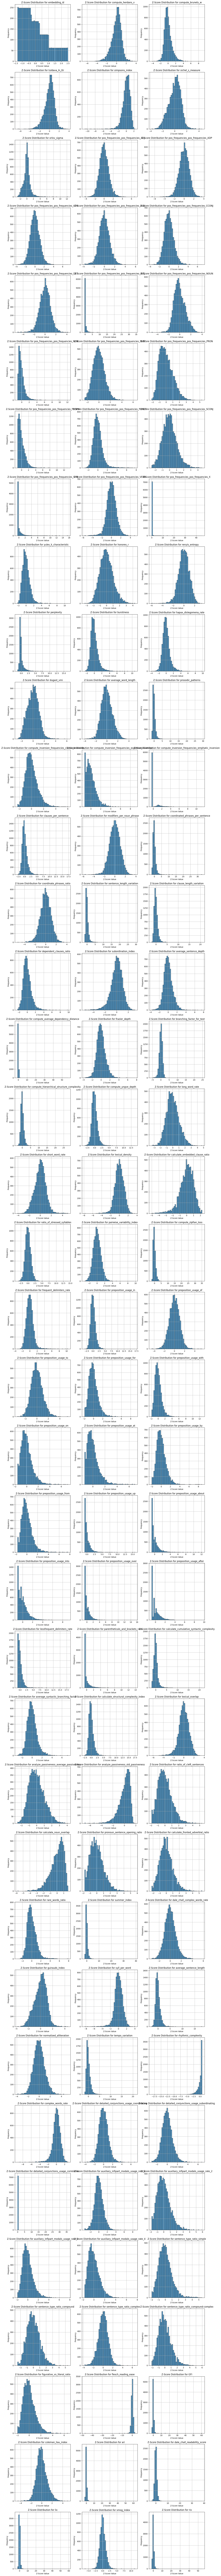

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file1 = pd.read_csv('ABB_30_embeddings.csv')
file2 = pd.read_csv('ABB_70_embeddings.csv')
file3 = pd.read_csv('AGG_30_embeddings.csv')
file4 = pd.read_csv('AGG_70_embeddings.csv')
combined_df = pd.concat([file1, file2, file3, file4])
numeric_columns = combined_df.select_dtypes(include='number').columns

filtered_columns = [col for col in numeric_columns if not np.all(combined_df[col] == 0)]

zscore_df = combined_df.copy()
zscore_df[filtered_columns] = zscore_df[filtered_columns].apply(lambda x: (x - x.mean()) / x.std(), axis=0)

# Plot the z-scores in separate subplots
num_plots = len(filtered_columns)
cols = 3  # Number of columns in the subplot grid
rows = (num_plots // cols) + int(num_plots % cols > 0)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(filtered_columns, start=1):
    plt.subplot(rows, cols, i)
    plt.hist(zscore_df[col], bins=50, alpha=0.75, edgecolor='black')
    plt.title(f'Z-Score Distribution for {col}')
    plt.xlabel('Z-Score Value')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()
